In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('..'))
os.chdir(os.path.dirname(sys.path[0])) # Este comando hace que el notebook sea la ruta principal y poder trabajar en cascada

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
laptop = pd.read_csv('MACHINE_LEARNING/test/data/train.csv', sep=';')
laptop

laptop_ID Company            Product   TypeName  Inches  \
0         1104    Acer     Aspire ES1-523   Notebook     156   
1          114    Dell             XPS 13  Ultrabook     133   
2          172    Acer    Aspire A517-51G   Notebook     173   
3          918      HP      Elitebook 820    Netbook     125   
4          447  Lenovo  IdeaPad 320-15AST   Notebook     173   
..         ...     ...                ...        ...     ...   
575        406  Lenovo        Thinkpad X1  Ultrabook     140   
576        285  Lenovo  IdeaPad 320-17IKB   Notebook     173   
577        972    Dell             XPS 13  Ultrabook     133   
578       1205    Acer     Aspire E5-576G   Notebook     156   
579        862    Asus   Rog GL502VM-DS74     Gaming     156   

                     ScreenResolution                          Cpu   Ram  \
0                            1366x768    AMD A8-Series 7410 2.2GHz   4GB   
1    Quad HD+ / Touchscreen 3200x1800   Intel Core i7 7560U 2.4GHz   8GB   
2         IPS Panel Full HD 1920x1080   Intel Core i5 8250U 1.6GHz   8GB   
3                   Full HD 1920x1080   Intel Core i7 7500U 2.7GHz   8GB   
4                            1600x900    AMD A6-Series 9220 2.5GHz   8GB   
..                                ...                          ...   ...   
575               IPS Panel 2560x1440   Intel Core i7 7500U 2.7GHz  16GB   
576                          1600x900   Intel Core i7 7500U 2.7GHz   6GB   
577                Quad HD+ 3200x1800   Intel Core i7 6500U 2.5GHz   8GB   
578                 Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   4GB   
579                 Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz  16GB   

                   Memory                           Gpu       OpSys  Weight  \
0               500GB HDD                 AMD Radeon R5  Windows 10   2.4kg   
1               256GB SSD  Intel Iris Plus Graphics 640  Windows 10  1.23kg   
2               256GB SSD          Nvidia GeForce MX150  Windows 10     3kg   
3               512GB SSD         Intel HD Graphics 620  Windows 10  1.26kg   
4                 1TB HDD                 AMD Radeon R4  Windows 10   2.8kg   
..                    ...                           ...         ...     ...   
575               1TB SSD         Intel HD Graphics 620  Windows 10  1.13kg   
576  128GB SSD +  1TB HDD          Nvidia GeForce 940MX  Windows 10   2.8kg   
577             256GB SSD         Intel HD Graphics 520  Windows 10   1.3kg   
578             256GB SSD          Nvidia GeForce 940MX  Windows 10  2.23kg   
579  128GB SSD +  1TB HDD                Nvidia GeForce         NaN     NaN   

     Price_euros  
0         3870.0  
1        13790.0  
2         8540.0  
3        14830.0  
4         5190.0  
..           ...  
575      26250.0  
576       8590.0  
577      12680.0  
578       6910.0  
579          NaN  

[580 rows x 13 columns]

In [4]:
laptop.shape

(580, 13)

In [6]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         580 non-null    int64  
 1   Company           580 non-null    object 
 2   Product           580 non-null    object 
 3   TypeName          580 non-null    object 
 4   Inches            580 non-null    int64  
 5   ScreenResolution  580 non-null    object 
 6   Cpu               580 non-null    object 
 7   Ram               580 non-null    object 
 8   Memory            580 non-null    object 
 9   Gpu               580 non-null    object 
 10  OpSys             579 non-null    object 
 11  Weight            579 non-null    object 
 12  Price_euros       579 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 59.0+ KB


In [8]:
laptop.describe()

laptop_ID      Inches    Price_euros
count   580.000000  580.000000     579.000000
mean    669.429310  150.377586   25204.732297
std     379.660038   13.943527   44188.754732
min       1.000000  116.000000    1919.000000
25%     349.500000  140.000000    6550.000000
50%     674.500000  156.000000   11240.000000
75%     975.750000  156.000000   18905.000000
max    1318.000000  184.000000  314737.000000

In [9]:
laptop.size

7540

In [71]:
laptop.head()

laptop_ID Company            Product   TypeName  Inches  \
0       1104    Acer     Aspire ES1-523   Notebook     156   
1        114    Dell             XPS 13  Ultrabook     133   
2        172    Acer    Aspire A517-51G   Notebook     173   
3        918      HP      Elitebook 820    Netbook     125   
4        447  Lenovo  IdeaPad 320-15AST   Notebook     173   

                   ScreenResolution                         Cpu  Ram  \
0                          1366x768   AMD A8-Series 7410 2.2GHz  4GB   
1  Quad HD+ / Touchscreen 3200x1800  Intel Core i7 7560U 2.4GHz  8GB   
2       IPS Panel Full HD 1920x1080  Intel Core i5 8250U 1.6GHz  8GB   
3                 Full HD 1920x1080  Intel Core i7 7500U 2.7GHz  8GB   
4                          1600x900   AMD A6-Series 9220 2.5GHz  8GB   

      Memory                           Gpu       OpSys  Weight  Price_euros  
0  500GB HDD                 AMD Radeon R5  Windows 10   2.4kg       3870.0  
1  256GB SSD  Intel Iris Plus Graphics 640  Windows 10  1.23kg      13790.0  
2  256GB SSD          Nvidia GeForce MX150  Windows 10     3kg       8540.0  
3  512GB SSD         Intel HD Graphics 620  Windows 10  1.26kg      14830.0  
4    1TB HDD                 AMD Radeon R4  Windows 10   2.8kg       5190.0

In [77]:
# agrupar los datos por "Company"
grouped = laptop.groupby('Company')

# calcular la suma de las ventas para cada compañía
sales_by_company = grouped[['Inches']].sum()

# mostrar los resultados
sales_by_company


Inches
Company          
Acer         6857
Apple        1299
Asus         9945
Dell        20960
Fujitsu       312
Google        246
HP          17420
LG            296
Lenovo      19776
MSI          4496
Mediacom      406
Microsoft     405
Razer         313
Samsung       439
Toshiba      3471
Xiaomi        578

TypeError: bar() missing 1 required positional argument: 'height'

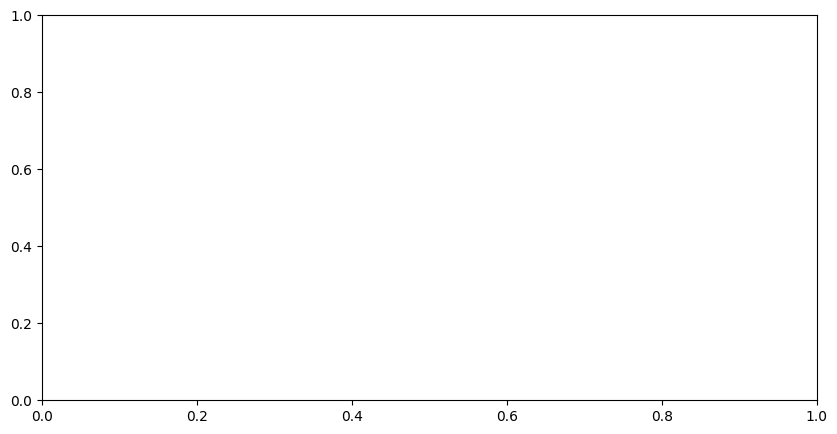

In [80]:
# crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# crear el gráfico de barras
ax.bar(sales_by_company)

# agregar etiquetas y título
ax.set_xlabel('Company')
ax.set_ylabel('Inches')
ax.set_title('Gráfico de barras')

# mostrar el gráfico
plt.show()


In [58]:
# Hacemos una copia del df
laptop_copy = laptop.copy()

In [11]:
# Vemos cuantos valores nulos tenemos 
laptop_copy[laptop_copy.isnull().any(axis=1)]

laptop_ID Company           Product TypeName  Inches   ScreenResolution  \
579        862    Asus  Rog GL502VM-DS74   Gaming     156  Full HD 1920x1080   

                             Cpu   Ram                Memory             Gpu  \
579  Intel Core i7 7700HQ 2.8GHz  16GB  128GB SSD +  1TB HDD  Nvidia GeForce   

    OpSys Weight  Price_euros  
579   NaN    NaN          NaN

In [12]:
# Eliminamos los NaN
laptop_copy.dropna(axis=0, inplace=True)

### Eliminamos las culumnas 
1. TypeName
1. Company
1. Product

In [59]:
laptop_copy.drop(['Company','TypeName','Product'],axis=1, inplace=True)

In [60]:
laptop_copy.head()

laptop_ID  Inches                  ScreenResolution  \
0       1104     156                          1366x768   
1        114     133  Quad HD+ / Touchscreen 3200x1800   
2        172     173       IPS Panel Full HD 1920x1080   
3        918     125                 Full HD 1920x1080   
4        447     173                          1600x900   

                          Cpu  Ram     Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz  4GB  500GB HDD                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz  8GB  256GB SSD  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz  8GB  256GB SSD          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz  8GB  512GB SSD         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz  8GB    1TB HDD                 AMD Radeon R4   

        OpSys  Weight  Price_euros  
0  Windows 10   2.4kg       3870.0  
1  Windows 10  1.23kg      13790.0  
2  Windows 10     3kg       8540.0  
3  Windows 10  1.26kg      14830.0  
4  Windows 10   2.8kg       5190.0

In [16]:
def remove_str_and_convert_to_int(df, column_name,):
    df[column_name] = df[column_name].str.replace('\D+', '').astype(int)

In [17]:
# Eliminamos los str de la columna Memory
remove_str_and_convert_to_int(laptop_copy, 'Memory')

# Eliminamos los str de la columna Ram
remove_str_and_convert_to_int(laptop_copy,'Ram')

C:\Users\varel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [18]:
def remove_str_and_convert_to_float(df, column_name):
    df[column_name] = df[column_name].str.replace('\D+', '').astype(float)

In [19]:
#hacemos un ramplazo para normalizar los valores 

laptop_copy['Memory'] = laptop_copy['Memory'].replace({1: 1000, 10: 1000, 256500: 756, 1281: 1128, 2561: 1256, 
                                                       5121: 1512, 512256: 768,  5122: 2512, 
                                                       256256: 512, 11: 2000, 2: 2000})

In [20]:
# Eliminamos el str Kg de la columna Weight y normalizamos los valores 

laptop_copy['Weight'] = laptop_copy['Weight'].apply(lambda x: int(float(x.replace('kg', '').strip()) * 1000))

In [21]:
laptop_copy["OpSys"] = laptop_copy["OpSys"].replace("No OS", "macOS")

 1. Windows 10 = 1 
 1. Linux = 2
 1. Mac OS X = 3
 1. Windows 7 = 4
 1. Chrome OS = 5 
 1. macOS = 6
 1. Windows 10 S = 7


In [22]:
# cada sistema operativo se convertirá en un número entero en la columna "OpSys".

os_dict = {'Windows 10': 1,  'Linux': 2, 'Mac OS X': 3, 'Windows 7': 4, 'Chrome OS': 5, 'macOS': 6, 'Windows 10 S': 7}
laptop_copy['OpSys'] = laptop_copy['OpSys'].map(os_dict)

In [23]:
laptop_copy.head()

Company  Inches                  ScreenResolution  \
0    Acer     156                          1366x768   
1    Dell     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer     173       IPS Panel Full HD 1920x1080   
3      HP     125                 Full HD 1920x1080   
4  Lenovo     173                          1600x900   

                          Cpu  Ram  Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   

   OpSys  Weight  Price_euros  
0      1    2400       3870.0  
1      1    1230      13790.0  
2      1    3000       8540.0  
3      1    1260      14830.0  
4      1    2800       5190.0

In [24]:
def extract_speed(text):
    speed = re.findall(r'\d+\.*\d*GHz', text)[0]
    speed = speed.replace('GHz', '')
    return float(speed)


In [25]:
laptop_copy['Cpu_GHz'] = laptop_copy['Cpu'].apply(extract_speed).astype(float)


In [26]:
def split_cpu(cpu):
    letters = ''.join(filter(str.isalpha, cpu))
    numbers = ''.join(filter(str.isdigit, cpu))
    return letters, numbers


In [27]:
laptop_copy[['Cpu_letters', 'Cpu_numbers']] = laptop_copy['Cpu'].apply(split_cpu).apply(pd.Series)


In [28]:
laptop_copy[['Gpu_letters', 'Gpu_numbers']] = laptop_copy['Gpu'].apply(split_cpu).apply(pd.Series)

In [29]:
laptop_copy.head()

Company  Inches                  ScreenResolution  \
0    Acer     156                          1366x768   
1    Dell     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer     173       IPS Panel Full HD 1920x1080   
3      HP     125                 Full HD 1920x1080   
4  Lenovo     173                          1600x900   

                          Cpu  Ram  Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   

   OpSys  Weight  Price_euros  Cpu_GHz     Cpu_letters Cpu_numbers  \
0      1    2400       3870.0      2.2   AMDASeriesGHz     8741022   
1      1    1230      13790.0      2.4  IntelCoreiUGHz     7756024   
2      1    3000       8540.0      1.6  IntelCoreiUGHz     5825016   
3      1    1260      14830.0      2.7  IntelCoreiUGHz     7750027   
4      1    2800       5190.0      2.5   AMDASeriesGHz     6922025   

             Gpu_letters Gpu_numbers  
0             AMDRadeonR           5  
1  IntelIrisPlusGraphics         640  
2        NvidiaGeForceMX         150  
3        IntelHDGraphics         620  
4             AMDRadeonR           4

In [30]:
laptop_copy['ScreenResolution'].unique()

array(['1366x768', 'Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Full HD 1920x1080', 'Full HD 1920x1080', '1600x900',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       'Full HD / Touchscreen 1920x1080', '1440x900',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Touchscreen 2256x1504',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel 1366x768', '4K Ultra HD 3840x2160',
       'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Retina Display 2880x1800',
       'IPS Panel Touchscreen 2560x1440', 'Touchscreen 1366x768',
       '2560x1440', 'IPS Panel Retina Display 2560x1600',
       'Quad HD+ 3200x1800', 'IPS Panel Full HD 2560x1440', '1920x1080',
       'Touchscreen 2400x1600', 'IPS Panel 2560x1440',
       'IPS Panel Quad HD+ 3200x1800'], dtype=object)

In [31]:


# Aplicar la función str.extract() para extraer los números
laptop_copy[['resolucion_x', 'resolucion_y']] = laptop_copy['ScreenResolution'].str.extract('(\d+)x(\d+)', expand=True)

# Imprimir el resultado
print(laptop_copy[['ScreenResolution', 'resolucion_x', 'resolucion_y']])


                     ScreenResolution resolucion_x resolucion_y
0                            1366x768         1366          768
1    Quad HD+ / Touchscreen 3200x1800         3200         1800
2         IPS Panel Full HD 1920x1080         1920         1080
3                   Full HD 1920x1080         1920         1080
4                            1600x900         1600          900
..                                ...          ...          ...
574                 Full HD 1920x1080         1920         1080
575               IPS Panel 2560x1440         2560         1440
576                          1600x900         1600          900
577                Quad HD+ 3200x1800         3200         1800
578                 Full HD 1920x1080         1920         1080

[579 rows x 3 columns]


In [32]:
# Se crea una columna llamada total_pixels y se aplica la función lambda 
laptop_copy['total_pixels'] = laptop_copy.apply(lambda row: int(row['resolucion_x']) * int(row['resolucion_y']), axis=1)


In [33]:
laptop_copy.head()

Company  Inches                  ScreenResolution  \
0    Acer     156                          1366x768   
1    Dell     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer     173       IPS Panel Full HD 1920x1080   
3      HP     125                 Full HD 1920x1080   
4  Lenovo     173                          1600x900   

                          Cpu  Ram  Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   

   OpSys  Weight  Price_euros  Cpu_GHz     Cpu_letters Cpu_numbers  \
0      1    2400       3870.0      2.2   AMDASeriesGHz     8741022   
1      1    1230      13790.0      2.4  IntelCoreiUGHz     7756024   
2      1    3000       8540.0      1.6  IntelCoreiUGHz     5825016   
3      1    1260      14830.0      2.7  IntelCoreiUGHz     7750027   
4      1    2800       5190.0      2.5   AMDASeriesGHz     6922025   

             Gpu_letters Gpu_numbers resolucion_x resolucion_y  total_pixels  
0             AMDRadeonR           5         1366          768       1049088  
1  IntelIrisPlusGraphics         640         3200         1800       5760000  
2        NvidiaGeForceMX         150         1920         1080       2073600  
3        IntelHDGraphics         620         1920         1080       2073600  
4             AMDRadeonR           4         1600          900       1440000

In [34]:
# Se eliminan las columnas que no son necesarias 
laptop_copy.drop(['ScreenResolution','Cpu','Gpu','resolucion_x','resolucion_y'],axis=1, inplace=True)

In [35]:
laptop_copy.head()

Company  Inches  Ram  Memory  OpSys  Weight  Price_euros  Cpu_GHz  \
0    Acer     156    4     500      1    2400       3870.0      2.2   
1    Dell     133    8     256      1    1230      13790.0      2.4   
2    Acer     173    8     256      1    3000       8540.0      1.6   
3      HP     125    8     512      1    1260      14830.0      2.7   
4  Lenovo     173    8    1000      1    2800       5190.0      2.5   

      Cpu_letters Cpu_numbers            Gpu_letters Gpu_numbers  total_pixels  
0   AMDASeriesGHz     8741022             AMDRadeonR           5       1049088  
1  IntelCoreiUGHz     7756024  IntelIrisPlusGraphics         640       5760000  
2  IntelCoreiUGHz     5825016        NvidiaGeForceMX         150       2073600  
3  IntelCoreiUGHz     7750027        IntelHDGraphics         620       2073600  
4   AMDASeriesGHz     6922025             AMDRadeonR           4       1440000

In [36]:
laptop_copy.describe()

Inches         Ram       Memory       OpSys       Weight  \
count  579.000000  579.000000   579.000000  579.000000   579.000000   
mean   150.367876    8.196891   591.018998    1.583765  2025.324698   
std     13.953621    4.546864   453.066634    1.457998   636.142969   
min    116.000000    2.000000    16.000000    1.000000   810.000000   
25%    140.000000    4.000000   256.000000    1.000000  1500.000000   
50%    156.000000    8.000000   500.000000    1.000000  2040.000000   
75%    156.000000    8.000000  1000.000000    1.000000  2300.000000   
max    184.000000   32.000000  2562.000000    7.000000  4500.000000   

         Price_euros     Cpu_GHz  total_pixels  
count     579.000000  579.000000  5.790000e+02  
mean    25204.732297    2.301416  2.140874e+06  
std     44188.754732    0.498783  1.391095e+06  
min      1919.000000    0.900000  1.049088e+06  
25%      6550.000000    2.000000  1.049088e+06  
50%     11240.000000    2.500000  2.073600e+06  
75%     18905.000000    2.700000  2.073600e+06  
max    314737.000000    3.600000  8.294400e+06

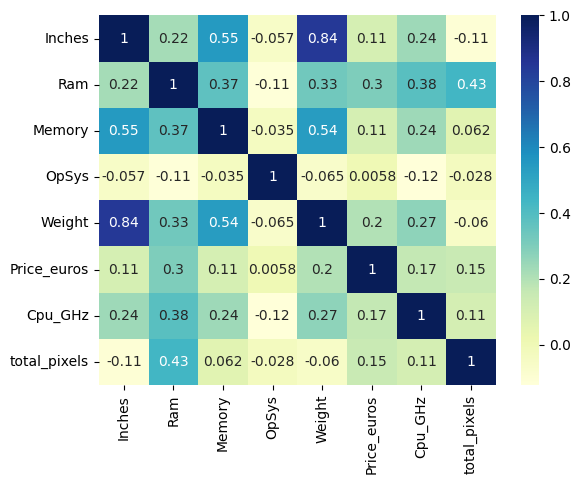

In [37]:
sns.heatmap(laptop_copy.corr(), cmap="YlGnBu", annot=True);


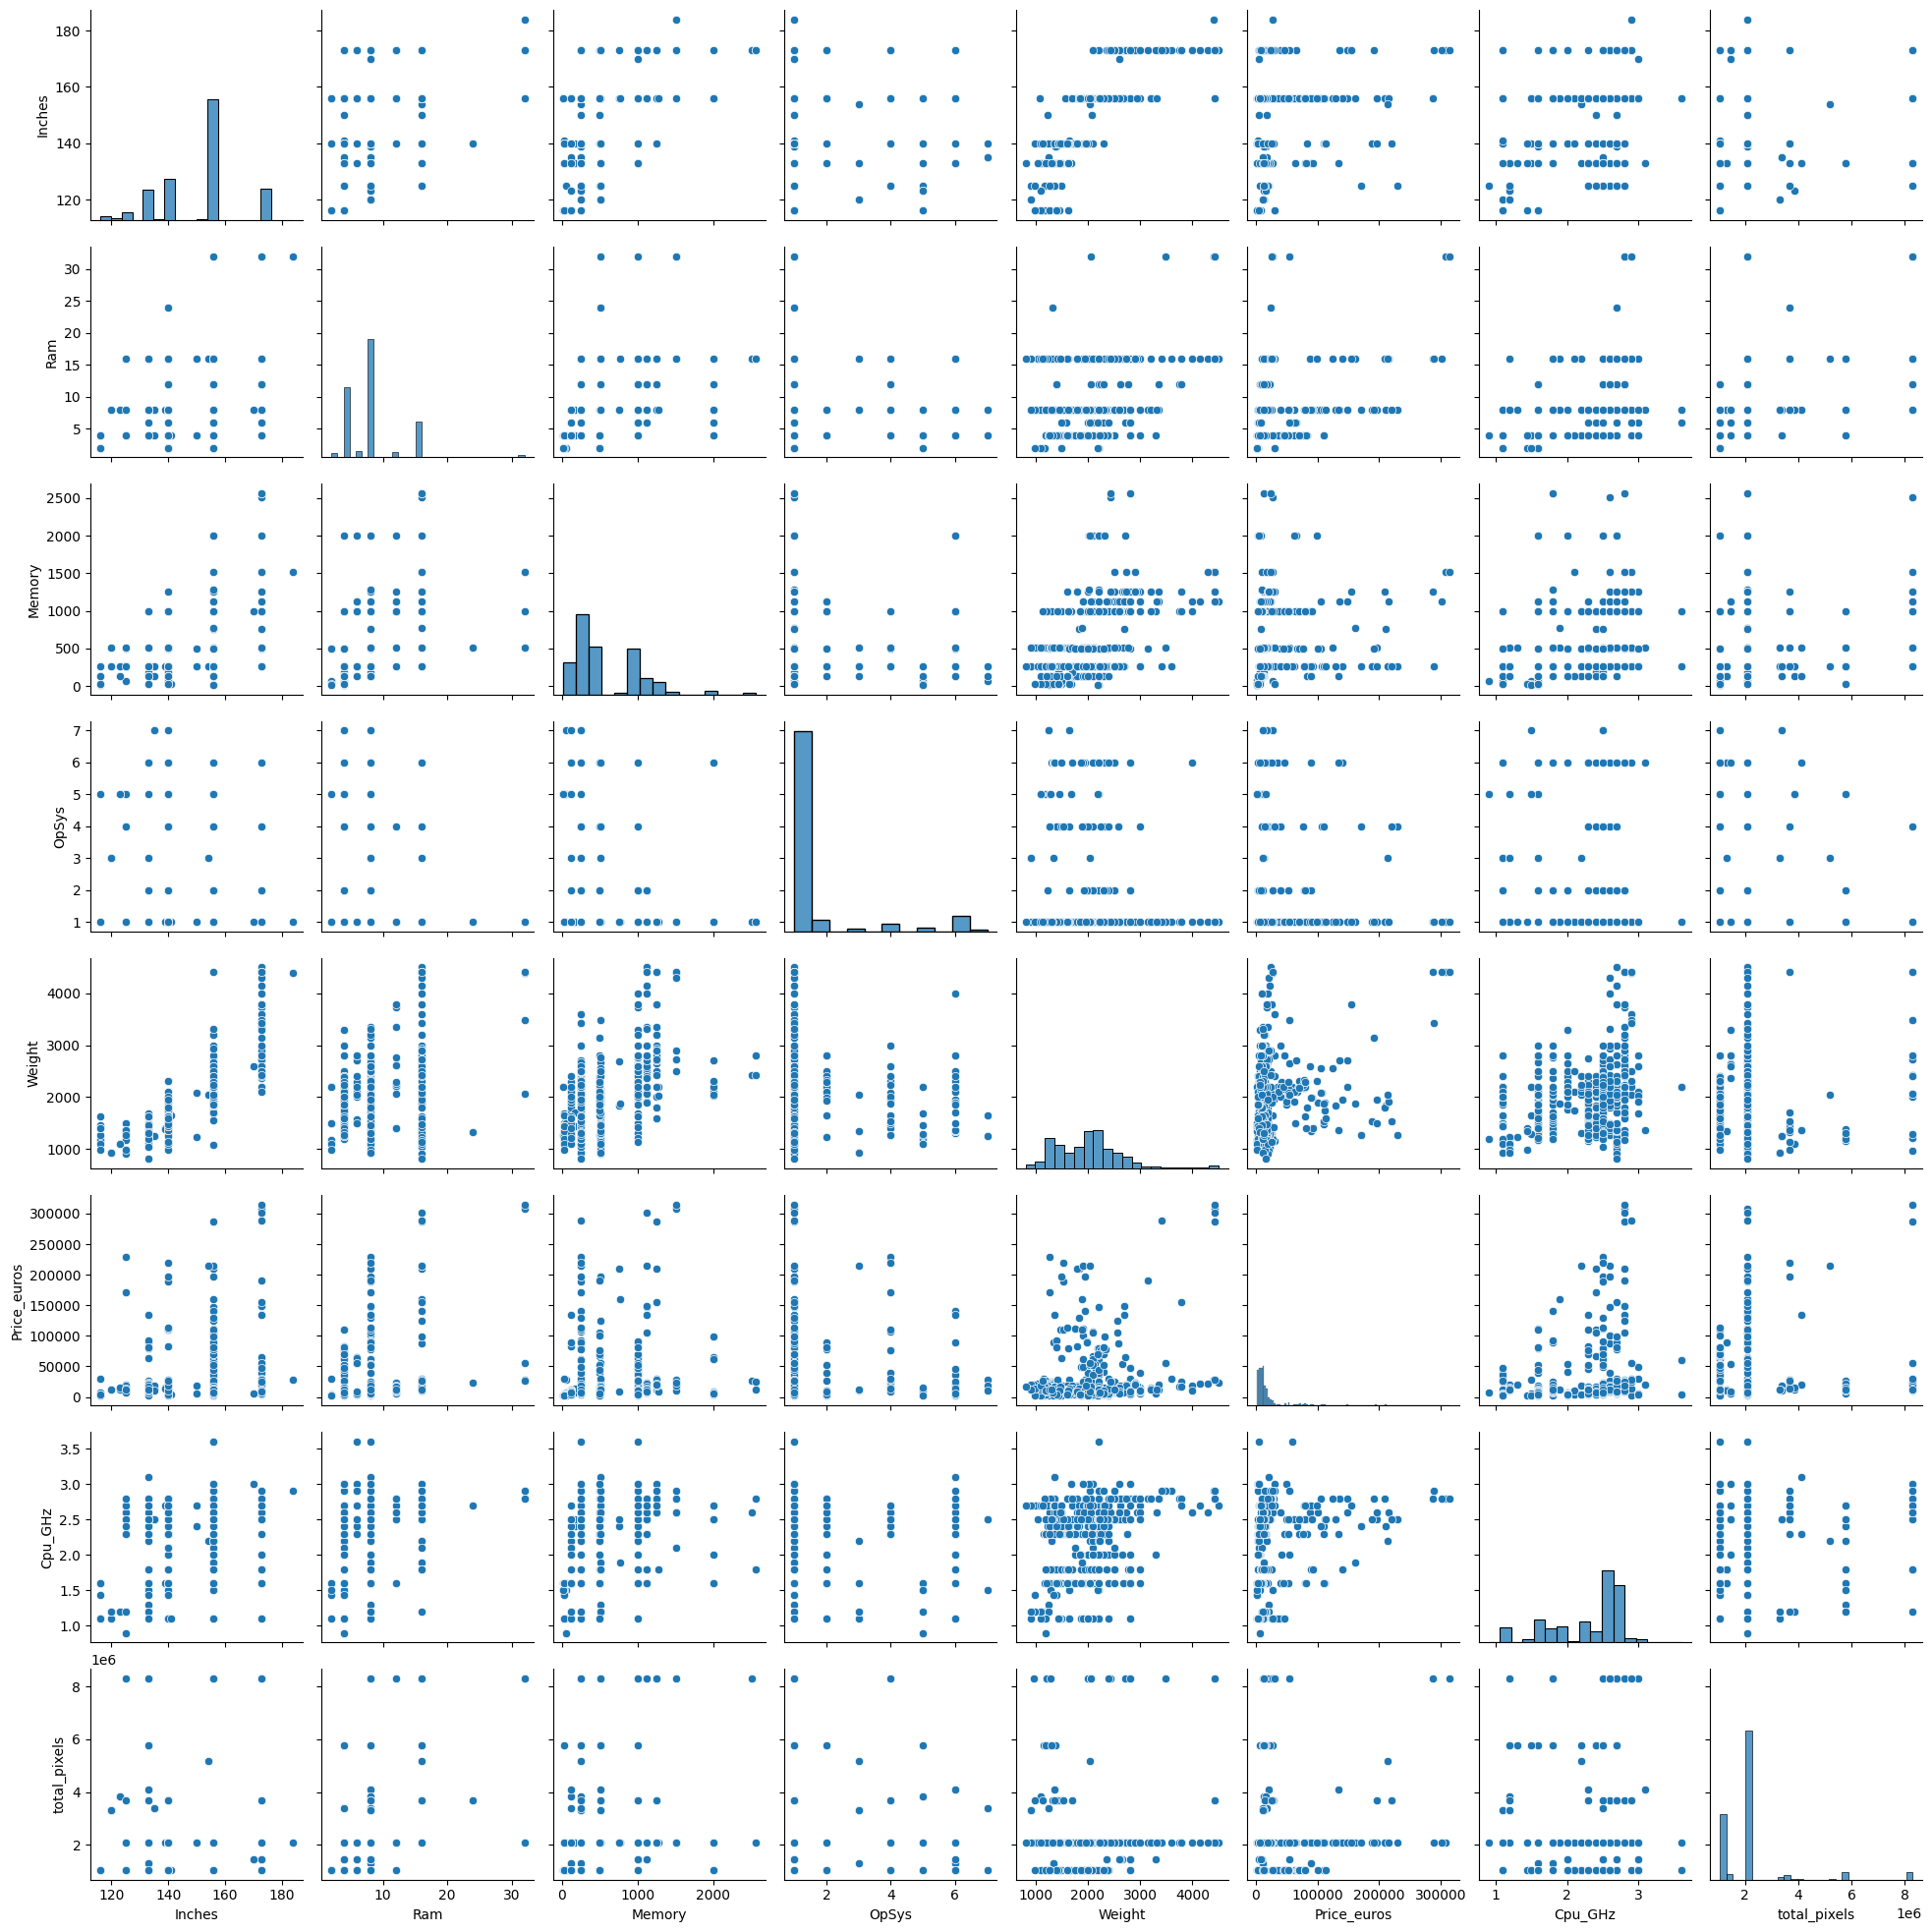

In [38]:
sns.pairplot(laptop_copy)

In [39]:
def analizar_columnas(df,col):
    resultados = {}
    media = np.mean(df[col])
    desv_est = np.std(df[col])
    minimo = np.min(df[col])
    maximo = np.max(df[col])
    mediana = np.median(df[col])
    p_25 =np.percentile(df[col],25)
    p_75 =np.percentile(df[col],75)
    resultados[col] = {'media': media, 'desviacion_estandar': desv_est, 
                       'minimo': minimo, 'maximo': maximo,'mediana': mediana,
                       'percentile_25': p_25, 'percentile_75': p_75 }
    
     
    
    sns.displot(data=df, x=col, kde=True, color='green')
    
    return resultados

Price_euros
desviacion_estandar   44150.578695
maximo               314737.000000
media                 25204.732297
mediana                        NaN
minimo                 1919.000000
percentile_25                  NaN
percentile_75                  NaN

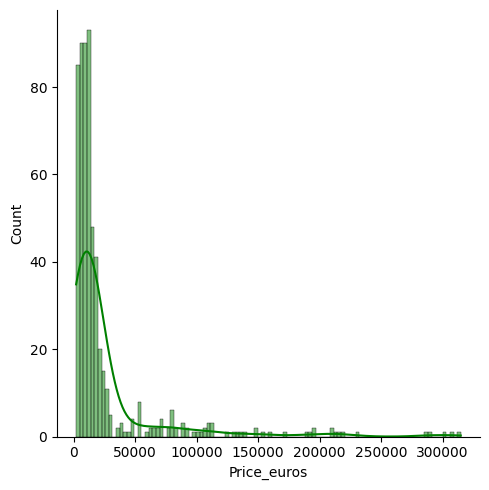

In [62]:
import warnings
warnings.filterwarnings('ignore')
laptop_precio =pd.DataFrame(analizar_columnas(laptop_copy,'Price_euros'));
laptop_precio

Ram
desviacion_estandar   4.542936
maximo               32.000000
media                 8.196891
mediana               8.000000
minimo                2.000000
percentile_25         4.000000
percentile_75         8.000000

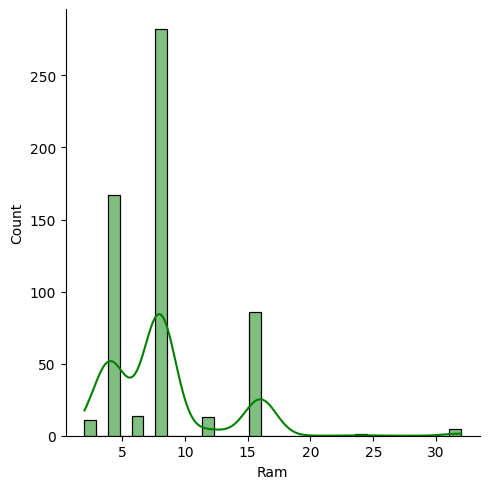

In [41]:
laptop_Ram =pd.DataFrame(analizar_columnas(laptop_copy,'Ram'));
laptop_Ram

Inches
desviacion_estandar   13.941566
maximo               184.000000
media                150.367876
mediana              156.000000
minimo               116.000000
percentile_25        140.000000
percentile_75        156.000000

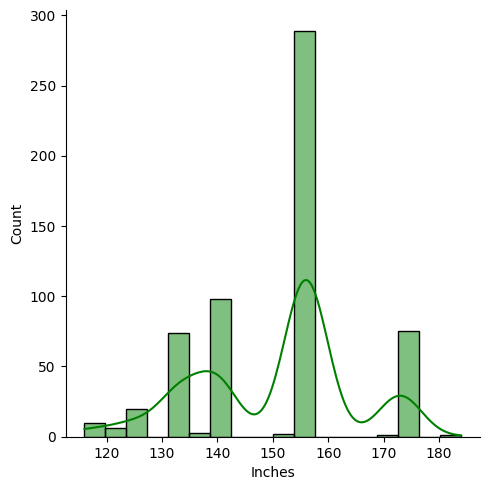

In [42]:
laptop_Inches =pd.DataFrame(analizar_columnas(laptop_copy,'Inches'));
laptop_Inches

OpSys
desviacion_estandar  1.456738
maximo               7.000000
media                1.583765
mediana              1.000000
minimo               1.000000
percentile_25        1.000000
percentile_75        1.000000

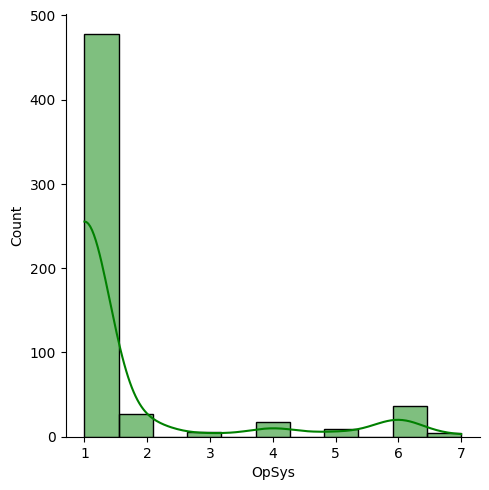

In [43]:
laptop_OpSys =pd.DataFrame(analizar_columnas(laptop_copy,'OpSys'));
laptop_OpSys

Memory
desviacion_estandar   452.675216
maximo               2562.000000
media                 591.018998
mediana               500.000000
minimo                 16.000000
percentile_25         256.000000
percentile_75        1000.000000

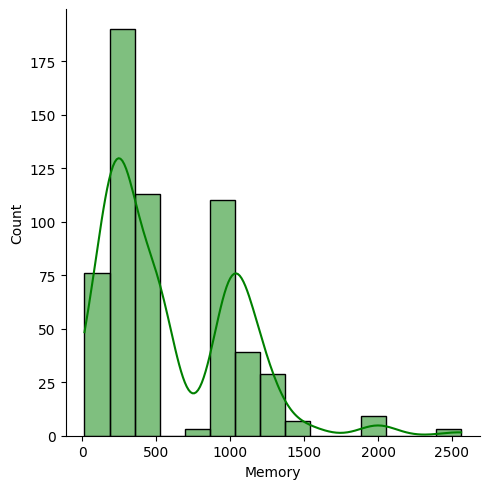

In [44]:
laptop_Memory =pd.DataFrame(analizar_columnas(laptop_copy,'Memory'));
laptop_Memory

Weight
desviacion_estandar   635.593385
maximo               4500.000000
media                2025.324698
mediana              2040.000000
minimo                810.000000
percentile_25        1500.000000
percentile_75        2300.000000

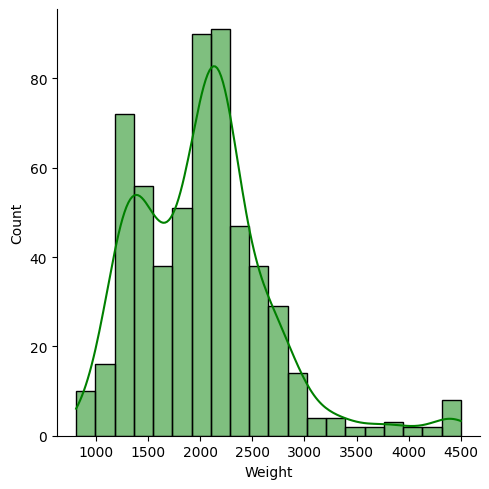

In [45]:
laptop_Weight =pd.DataFrame(analizar_columnas(laptop_copy,'Weight'));
laptop_Weight

Cpu_GHz
desviacion_estandar  0.498352
maximo               3.600000
media                2.301416
mediana              2.500000
minimo               0.900000
percentile_25        2.000000
percentile_75        2.700000

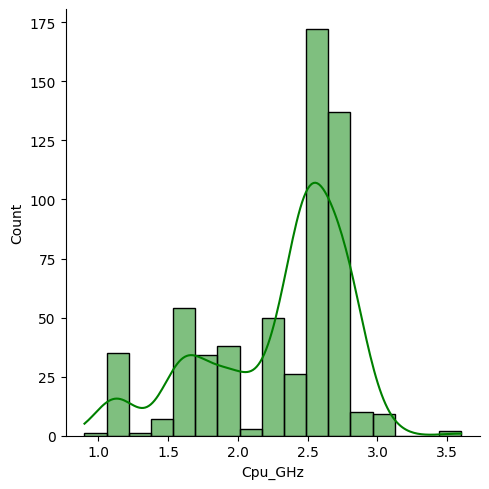

In [46]:
laptop_Cpu_GHz =pd.DataFrame(analizar_columnas(laptop_copy,'Cpu_GHz'));
laptop_Cpu_GHz

total_pixels
desviacion_estandar  1.389894e+06
maximo               8.294400e+06
media                2.140874e+06
mediana              2.073600e+06
minimo               1.049088e+06
percentile_25        1.049088e+06
percentile_75        2.073600e+06

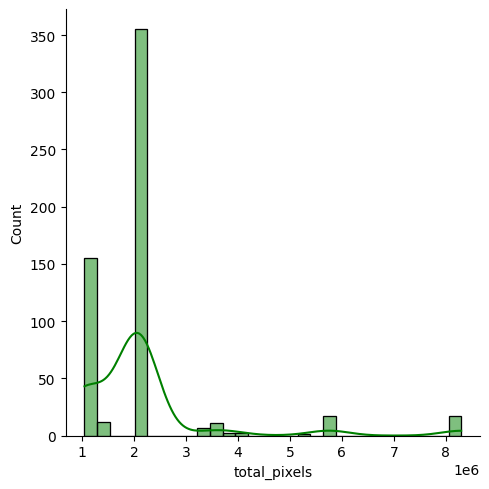

In [47]:
laptop_total_pixels =pd.DataFrame(analizar_columnas(laptop_copy,'total_pixels'));
laptop_total_pixels